In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lshlink as lsh
from mpl_toolkits.mplot3d import Axes3D

In [2]:
kershaw = pd.read_csv('../data/Kershaw.csv').iloc[:, 1:5]
kershaw_data = np.array(kershaw.iloc[:, 0:3])
kershaw_labels = np.array(kershaw.iloc[:, 3])

a = np.array([0])
b = np.min(kershaw_data, axis = 0)[1:3]
shift = np.r_[a, b]
kershaw_data_shifted = kershaw_data - shift
kersh_clusters = lsh.LSHLink(kershaw_data_shifted,
                             A = 1.4, l = 10, k = 100,
                             seed1 = 12, seed2 = 6, cutoff = 2)

In [3]:
kersh_full = np.c_[kershaw_data, kersh_clusters]

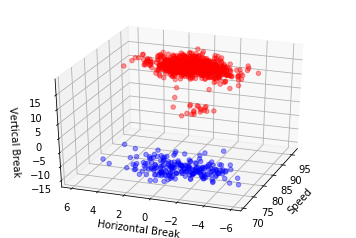

In [4]:
g1 = np.where(kersh_clusters == np.unique(kersh_clusters)[0])[0]
g2 = np.where(kersh_clusters == np.unique(kersh_clusters)[1])[0]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(kersh_full[g1, 0], kersh_full[g1, 1], kersh_full[g1, 2],
           alpha = 0.4, c = 'red')
ax.scatter(kersh_full[g2, 0], kersh_full[g2, 1], kersh_full[g2, 2],
           alpha = 0.4, c = 'blue')
ax.view_init(azim=200)
ax.set_xlabel('Speed')
ax.set_ylabel('Horizontal Break')
ax.set_zlabel('Vertical Break')
plt.show()

In [5]:
class_LSH = kersh_clusters == 32
class_TRUE = kershaw_labels == 'FF'
sum(np.equal(class_LSH, class_TRUE))/kershaw.shape[0]

1.0